# Assignment (15-09-2023)

## Rethi Komal - 21BRS1210

## Importing Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## Importing Dataset

In [87]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [88]:
df.shape

(891, 12)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling Null Data

In [91]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [92]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]/len(df)*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [93]:
# Initially
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
# Handling Embarked (Deleting Rows)
df = df.dropna(subset=['Embarked'])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [95]:
# Handling Cabin (Deleting Column)
df = df.drop(columns=['Cabin'])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [96]:
# Handling Age (Filling With Mean)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization

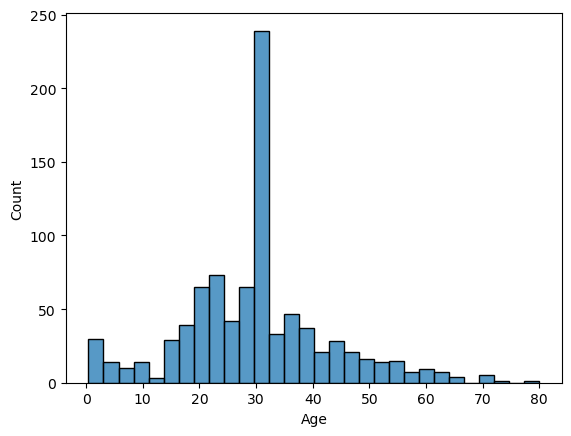

In [98]:
# Visualizing the distribution of age
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.show()

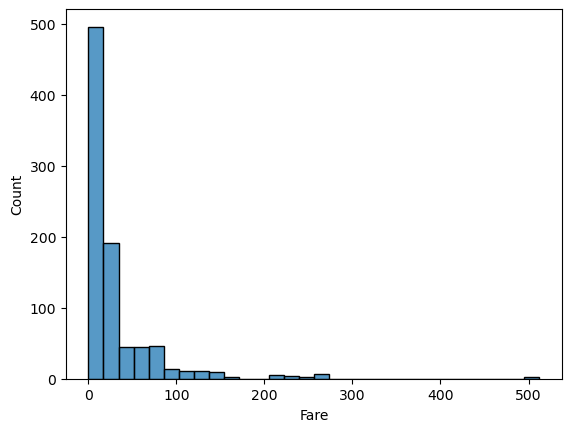

In [99]:
# Visualizing the distribution of fare
sns.histplot(df['Fare'].dropna(), kde=False, bins=30)
plt.show()

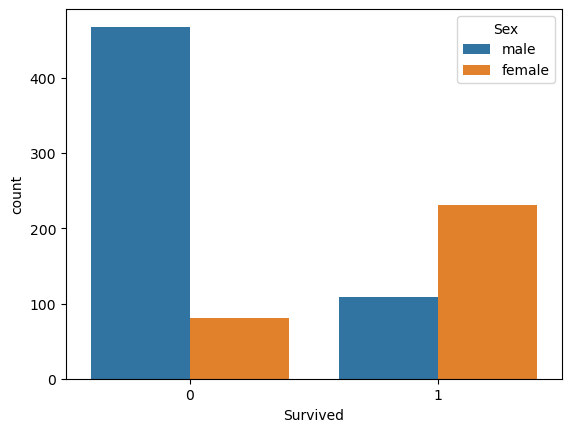

In [100]:
# Visualizing the survival rate based on gender
sns.countplot(x='Survived', data=df, hue='Sex')
plt.show()

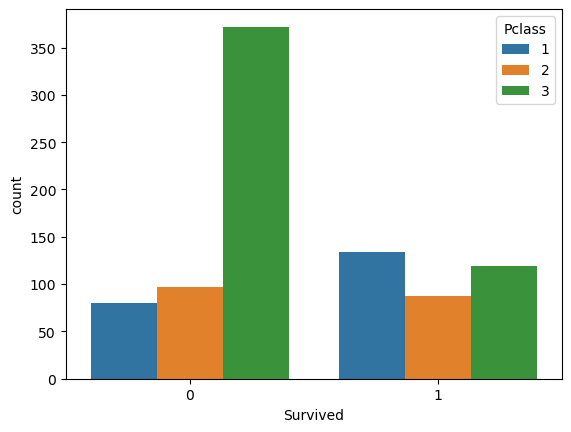

In [101]:
# Visualizing the survival rate based on passenger class
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.show()

<Axes: >

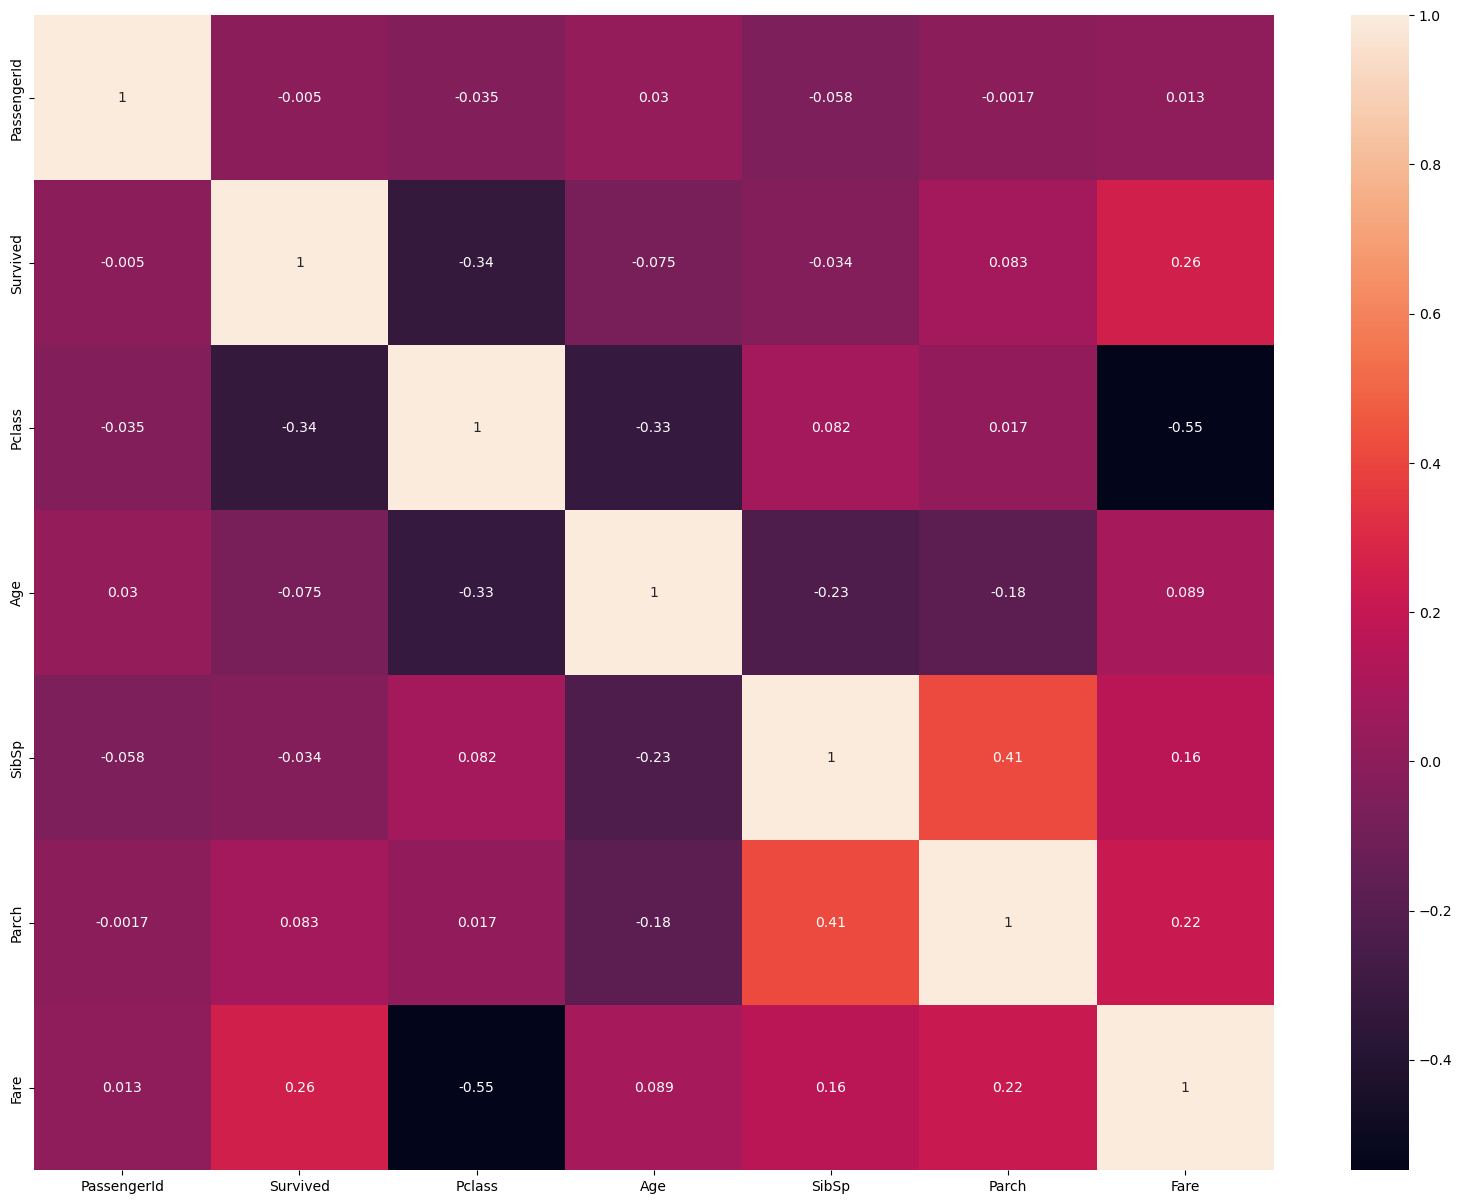

In [102]:
# Visualizing The Heat Map
corr=df.corr( numeric_only=True)
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [106]:
df = df.drop(['PassengerId','Ticket','Name'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Splitting Data (Dependent & Independent Variables)

In [107]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [108]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [109]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Encoding

In [110]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

In [116]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


## Outliers

<Axes: >

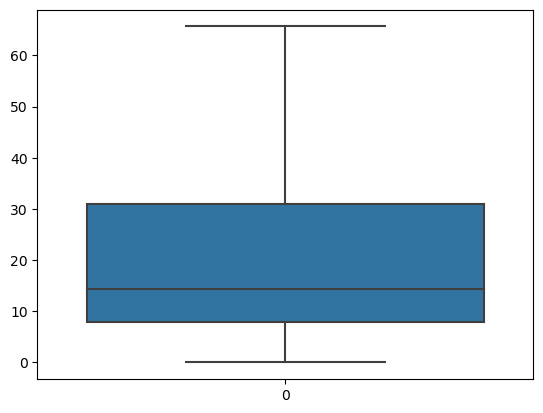

In [117]:
sns.boxplot(df['Fare'])

<Axes: >

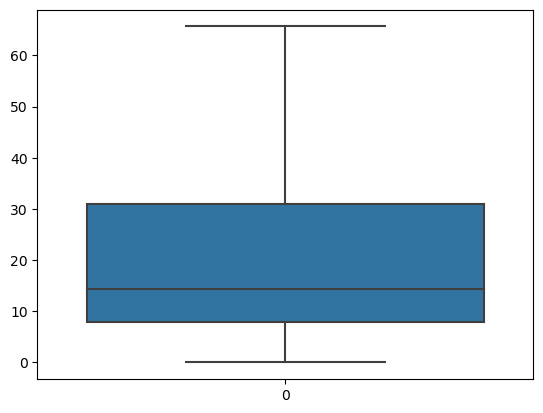

In [118]:
# Flooring And Capping
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))
sns.boxplot(df['Fare'])

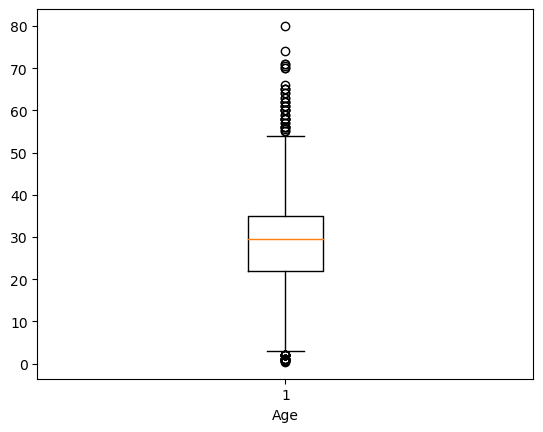

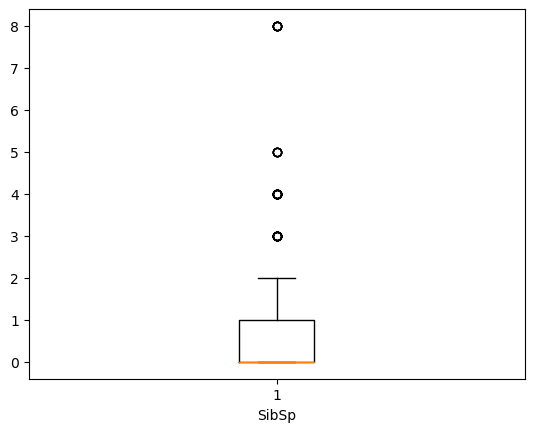

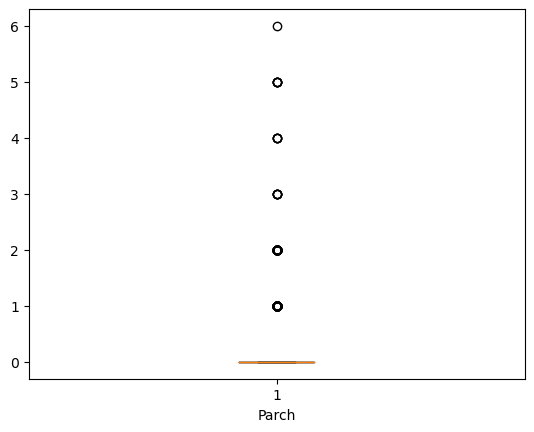

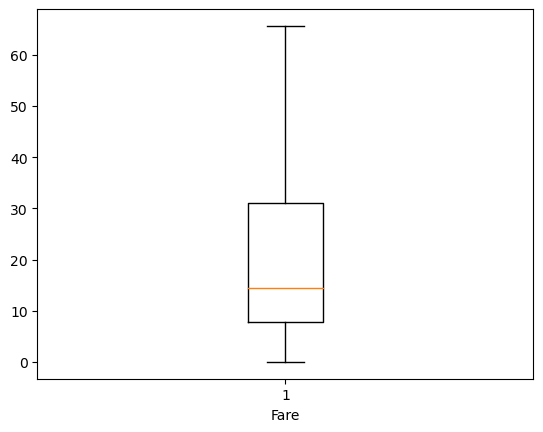

In [122]:
for feature in X.columns[2:6]:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [124]:
for feature in X.columns[2:6]:
    IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_bridge = df[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge = df[feature].quantile(0.75)+(IQR*1.5)
    
    lower_bridge3 = df[feature].quantile(0.25)-(IQR*3)
    upper_bridge3 = df[feature].quantile(0.75)+(IQR*3)
    
    
    df.loc[df[feature]<=lower_bridge,feature] = lower_bridge
    df.loc[df[feature]>=upper_bridge,feature] = upper_bridge

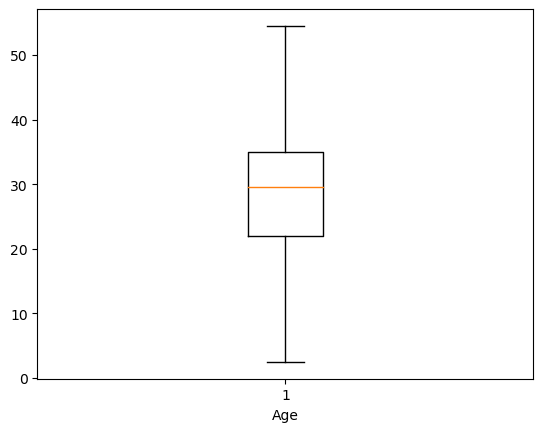

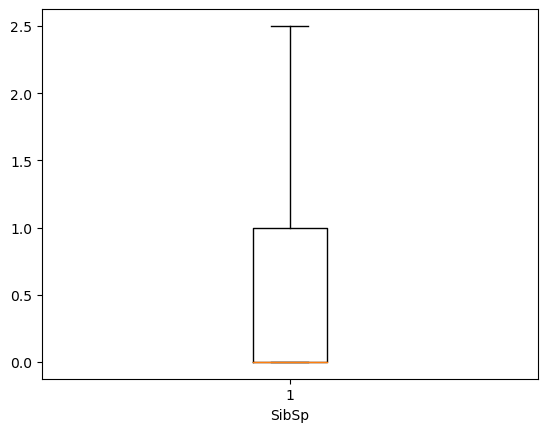

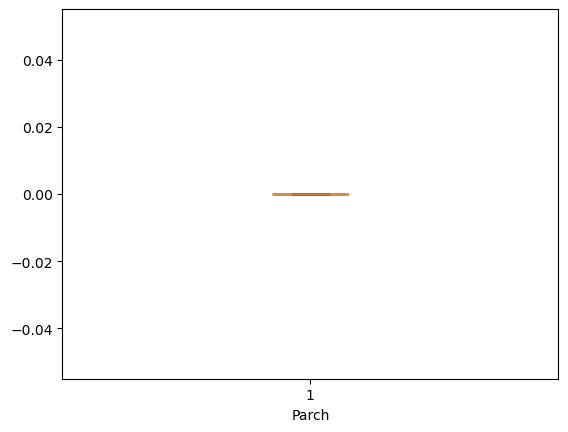

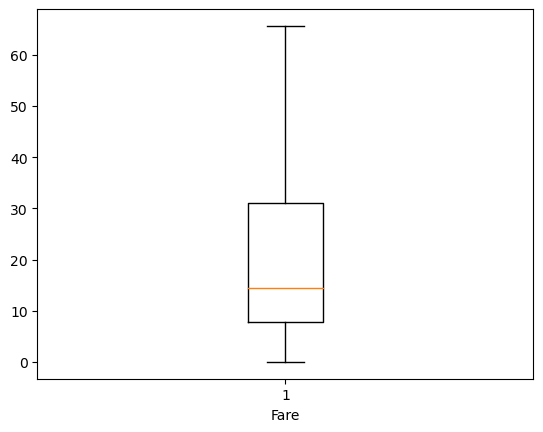

In [125]:
for feature in X.columns[2:6]:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

## Feature Scaling

In [126]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

## Splitting Data (Test & Train)

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,1,0,-5.896199e-01,0,0,2.404961,2
240,3,0,-5.482138e-16,1,0,-0.355197,0
382,3,1,1.819225e-01,0,0,-0.486650,2
792,3,0,-5.482138e-16,8,2,0.754050,2
683,3,1,-1.206854e+00,5,2,0.298036,2
...,...,...,...,...,...,...,...
107,3,1,-5.482138e-16,0,0,-0.489670,2
271,3,1,-3.581571e-01,0,0,-0.646204,2
862,1,0,1.416390e+00,0,0,-0.124170,2
436,3,0,-6.667741e-01,2,2,0.045870,2


In [129]:
y_train

708    1
240    0
382    0
792    0
683    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 711, dtype: int64

In [130]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
281,3,1,-0.126694,0,0,-0.488075,2
435,1,0,-1.206854,1,2,1.769763,2
39,3,0,-1.206854,1,0,-0.419875,0
418,2,1,0.027614,0,0,-0.384475,2
585,1,0,-0.898237,0,2,0.957394,2
...,...,...,...,...,...,...,...
433,3,1,-0.975391,0,0,-0.502756,2
807,3,0,-0.898237,0,0,-0.489670,2
25,3,0,0.644848,1,5,-0.014278,2
85,3,0,0.259077,3,0,-0.327095,2


In [131]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64